<a href="https://colab.research.google.com/github/PrateekCoder/lets_data_science/blob/main/LightGBM_An_Efficient_Frontier_in_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the required Packages

In [3]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import lightgbm as lgb

## Load the Dataset

In [4]:
# Load the Breast Cancer Wisconsin dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

## Prepare the Dataset

In [5]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM data matrix from the training data
lgb_train = lgb.Dataset(X_train, y_train)

# Define the parameters for the LightGBM
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 5,
    'max_depth': 6,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
}

## Train the Model

In [6]:
# Train the model
model = lgb.train(params, lgb_train, num_boost_round=20)

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093


## Make Prediction Using Light GBM

In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Convert predictions into binary outputs
for i in range(len(y_pred)):
    if y_pred[i]>=.5:
       y_pred[i]=1
    else:
       y_pred[i]=0

## Model Evaluation

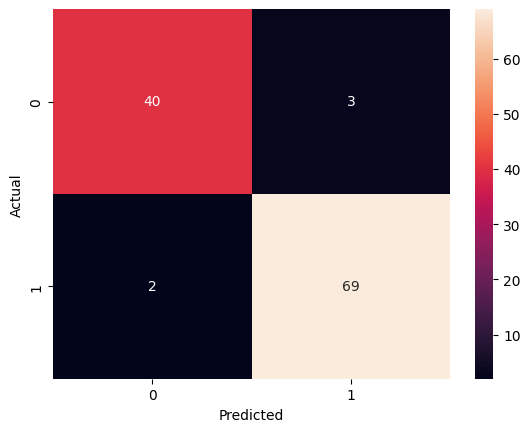

In [8]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

